# Text Classification with AutoGluon

https://auto.gluon.ai/stable/index.html

This is an excellent library from AWS that may be used for multimodal machine learning in an automatic manner. It uses stack-ensembling and beats most kaggle competition winners. See the papers in the Guthub repo: https://github.com/awslabs/autogluon



In [1]:
from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
os.chdir('drive/My Drive')
os.chdir('Books_Writings/NLPBook/')

Mounted at /content/drive


In [2]:
%%capture
# %pylab inline
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Use AutoGluon Tabular on News Dataset

We need to first install Meta's PyTorch framework and then install AutoGluon, which runs on top of PyTorch. This is an extensive installation, and will take some time.

AutoGluon installation instructions: https://auto.gluon.ai/stable/install.html

In [3]:
%%time
!pip install -U pip
!pip install -U setuptools wheel
# !pip install -U uv

# CPU version of pytorch has smaller footprint - see installation instructions in
# pytorch documentation - https://pytorch.org/get-started/locally/
# !uv pip install torch==2.3.1 torchvision==0.18.1 --index-url https://download.pytorch.org/whl/cpu --system

# !uv pip install autogluon --system
!pip install autogluon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.8 MB

CPU times: user 592 ms, sys: 176 ms, total: 769 ms
Wall time: 1min 18s


In [4]:
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
# Read data
df = pd.read_csv('NLP_data/Sentences_AllAgree.txt', sep=".@", header=None, engine='python', encoding = "ISO-8859-1")  # Finbert data
# df = pd.read_csv('NLP_data/Sentences_AllAgree.txt', sep=".@", header=None, engine='python', encoding = "utf-8")  # Finbert data
# tmp = pd.read_csv('NLP_data/Sentences_75Agree.txt', sep=".@", header=None, engine='python')
# df = pd.concat([df,tmp])
# tmp = pd.read_csv('NLP_data/Sentences_66Agree.txt', sep=".@", header=None, engine='python')
# df = pd.concat([df,tmp])
# tmp = pd.read_csv('NLP_data/Sentences_50Agree.txt', sep=".@", header=None, engine='python')
# df = pd.concat([df,tmp])
df.columns = ["Text","Label"]
print(df.shape)
df.head()

(2264, 2)


Text     Label
0  According to Gran , the company has no plans t...   neutral
1  For the last quarter of 2010 , Componenta 's n...  positive
2  In the third quarter of 2010 , net sales incre...  positive
3  Operating profit rose to EUR 13.1 mn from EUR ...  positive
4  Operating profit totalled EUR 21.1 mn , up fro...  positive

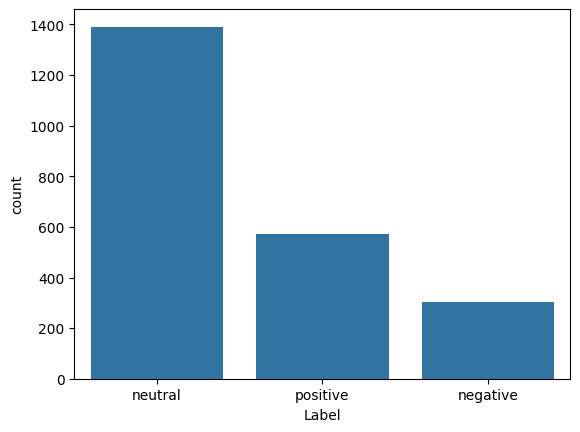

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Label', data=df)
plt.show()

## Fit the model

The next few lines of code are all that are needed to train the model. It is remarkable in its parsimony!

The vectorization of the text adjusts the size of the vocabulary so that it uses the available memory efficiently.

In [7]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.


In [8]:
%%time
#TRAIN THE MODEL

train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

predictor = TabularPredictor(label='Label').fit(train_data=train_data) #,    hyperparameters='multimodal')

# predictor = task.fit(train_data=train_data, label='Label')
performance = predictor.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250123_044506"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.72 GB / 12.67 GB (84.6%)
Disk Space Avail:   76.49 GB / 112.64 GB (67.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

Train size = (1584, 2)  | Test size = (680, 2)


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/Books_Writings/NLPBook/AutogluonModels/ag-20250123_044506"
Train Data Rows:    1584
Train Data Columns: 1
Label Column:       Label
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	3 unique label values:  ['neutral', 'positive', 'negative']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10982.39 MB
	Train Data (Original)  Memory Usage: 0.27 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify s

CPU times: user 29.9 s, sys: 2.23 s, total: 32.1 s
Wall time: 36.5 s


In [9]:
# TEST OUT-OF-SAMPLE

y_test = test_data['Label']
test_data_nolabel = test_data.drop(labels=['Label'],axis=1)
y_pred = predictor.predict(test_data_nolabel)
y_prob = predictor.predict(test_data_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)
print(perf)

{'accuracy': 0.8720588235294118, 'balanced_accuracy': 0.7908290922121237, 'mcc': 0.7572923133729487}


## Metrics

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

https://srdas.github.io/MLBook2/3_MachineLearningOverview.html

https://srdas.github.io/MLBook2/3_MachineLearningOverview.html#ROC-and-AUC

## Movie Reviews, one more time, with AG-Tabular

In [ ]:
train_data = pd.read_csv("NLP_data/movie_review_train.txt", sep = " ", header=None)
test_data = pd.read_csv("NLP_data/movie_review_test.txt", sep = " ", header=None)
train_data.columns = ['Label','Text']
test_data.columns = ['Label','Text']
print(train_data.shape, test_data.shape)
train_data.head()

(4001, 2) (1000, 2)


Label  \
0  __label__0   
1  __label__1   
2  __label__1   
3  __label__0   
4  __label__1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Text  
0  Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home,...  
1  This film lacked something I couldn't put my finger on at first: charisma on the part of the leading actress. This inevitably translated to lack of chemistry when she shared the screen with her leading man. Even the romantic scenes came across as being merely the actors at play. It could very well have been the director who miscalculated what he needed from the actors. I just don't know.<br /><br />But could it have been the screenplay? Just exactly who was the chef in love with? He seemed more enamored of his culinary skills and restaurant, and ultimately of himself and his youthful explo...  
2  \"It appears that many critics find the idea of a Woody Allen drama unpalatable.\" And for good reason: they are unbearably wooden and pretentious imitations of Bergman. And let's not kid ourselves: critics were mostly supportive of Allen's Bergman pretensions, Allen's whining accusations to the contrary notwithstanding. What I don't get is this: why was Allen generally applauded for his originality in imitating Bergman, but the contemporaneous Brian DePalma was excoriated for \"ripping off\" Hitchcock in his suspense/horror films? In Robin Wood's view, it's a strange form of cultural snob...  
3  This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.<br /><br />Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.<br /><br />I must say that I was highly entertained, though this...  
4  I don't know who to blame, the timid writers or the clueless director. It seemed to be one of those movies where so much was paid to the stars (Angie, Charlie, Denise, Rosanna and Jon) that there wasn't enough left to really make a movie. This could have been very entertaining, but there was a veil of timidity, even cowardice, that hung over each scene. Since it got an R rating anyway why was the ubiquitous bubble bath scene shot with a 70-year-old woman and not Angie Harmon? Why does Sheen sleepwalk through potentially hot relationships WITH TWO OF THE MOST BEAUTIFUL AND SEXY ACTRESSES in...

In [ ]:
%%time
#TRAIN THE MODEL

print("Train size =",train_data.shape," | Test size =",test_data.shape)

predictor = TabularPredictor(label='Label').fit(train_data=train_data) #,    hyperparameters='multimodal')
performance = predictor.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250120_220737"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.91 GB / 12.67 GB (86.1%)
Disk Space Avail:   76.38 GB / 112.64 GB (67.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

Train size = (4001, 2)  | Test size = (1000, 2)


	2 unique label values:  ['__label__0', '__label__1']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = __label__1, class 0 = __label__0
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (__label__1) vs negative (__label__0) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11179.74 MB
	Train Data (Original)  Memory Usage: 5.25 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtyp

CPU times: user 6min 13s, sys: 5.68 s, total: 6min 18s
Wall time: 6min 10s


In [ ]:
%%time
# TEST OUT-OF-SAMPLE

y_test = test_data['Label']
test_data_nolabel = test_data.drop(labels=['Label'],axis=1)
y_pred = predictor.predict(test_data_nolabel)
y_prob = predictor.predict_proba(test_data_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)
print(perf)

{'accuracy': 0.842, 'balanced_accuracy': 0.8420313681254725, 'mcc': 0.6843694036793613, 'f1': 0.8397565922920892, 'precision': 0.8536082474226804, 'recall': 0.8263473053892215}
CPU times: user 2.94 s, sys: 17.6 ms, total: 2.96 s
Wall time: 3.14 s


<ipython-input-13-be9385ae72ab>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_score = [1 if y_prob.loc[i][1]>y_prob.loc[i][0] else 0 for i in range(len(y_prob)) ]


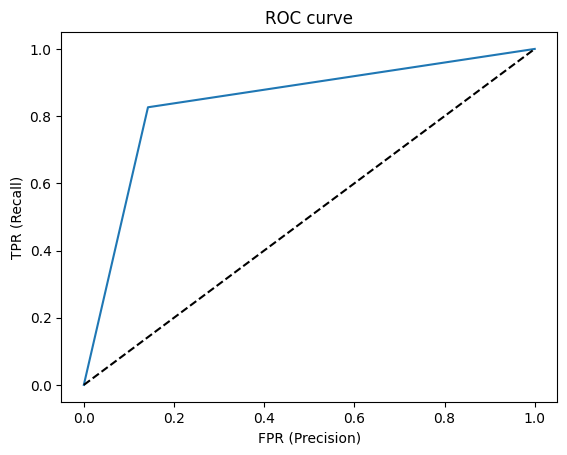

Area under curve (AUC):  0.8420313681254725


In [ ]:
#ROC, AUC
import numpy as np
from sklearn.metrics import roc_curve, auc
y_score = [1 if y_prob.loc[i][1]>y_prob.loc[i][0] else 0 for i in range(len(y_prob)) ]
y_true = np.array([1 if j=="__label__1" else 0 for j in y_test])
fpr, tpr, _ = roc_curve(y_true, y_score)

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
predictor.leaderboard(test_data, silent=True)

model  score_test  score_val eval_metric  pred_time_test  \
0        ExtraTreesGini       0.848      0.842    accuracy        0.190400   
1            LightGBMXT       0.842      0.880    accuracy        0.127215   
2   WeightedEnsemble_L2       0.842      0.880    accuracy        0.132827   
3        ExtraTreesEntr       0.841      0.858    accuracy        0.221819   
4              LightGBM       0.833      0.868    accuracy        0.128563   
5      RandomForestGini       0.828      0.856    accuracy        0.205604   
6               XGBoost       0.819      0.850    accuracy        0.129552   
7              CatBoost       0.819      0.858    accuracy        0.201900   
8      RandomForestEntr       0.815      0.846    accuracy        0.192870   
9         LightGBMLarge       0.805      0.842    accuracy        0.126158   
10      NeuralNetFastAI       0.567      0.620    accuracy        0.029828   
11       KNeighborsDist       0.567      0.590    accuracy        1.165190   
12       KNeighborsUnif       0.567      0.590    accuracy        1.173159   
13       NeuralNetTorch       0.541      0.628    accuracy        0.028997   

    pred_time_val    fit_time  pred_time_test_marginal  \
0        0.082387   15.128048                 0.190400   
1        0.045832   11.276500                 0.127215   
2        0.046614   11.560580                 0.005612   
3        0.081660   15.087257                 0.221819   
4        0.037030   13.740872                 0.128563   
5        0.081731   12.945693                 0.205604   
6        0.061628  115.041127                 0.129552   
7        0.182935   43.606833                 0.201900   
8        0.093459   13.665560                 0.192870   
9        0.061159   44.964239                 0.126158   
10       0.019140    5.647088                 0.029828   
11       0.787996    2.311469                 1.165190   
12       0.494338    1.674805                 1.173159   
13       0.015831    8.111764                 0.028997   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.082387          15.128048            1       True   
1                 0.045832          11.276500            1       True   
2                 0.000782           0.284079            2       True   
3                 0.081660          15.087257            1       True   
4                 0.037030          13.740872            1       True   
5                 0.081731          12.945693            1       True   
6                 0.061628         115.041127            1       True   
7                 0.182935          43.606833            1       True   
8                 0.093459          13.665560            1       True   
9                 0.061159          44.964239            1       True   
10                0.019140           5.647088            1       True   
11                0.787996           2.311469            1       True   
12                0.494338           1.674805            1       True   
13                0.015831           8.111764            1       True   

    fit_order  
0           8  
1           3  
2          14  
3           9  
4           4  
5           5  
6          11  
7           7  
8           6  
9          13  
10         10  
11          2  
12          1  
13         12

The hyperparameter option `multimodal` below will also do hyperparameter tuning, which takes considerable time, so wait for it to finish. Maybe best to skip over this code segment.

In [ ]:
%%time

# predictor = TabularPredictor(label='Label').fit(train_data=train_data, hyperparameters='multimodal')
# y_test = test_data['Label']
# test_data_nolabel = test_data.drop(labels=['Label'],axis=1)
# y_pred = predictor.predict(test_data_nolabel)
# perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


## Multimodal Extension

AutoGluon can also handle images in addition to text and here is an example from their library from: https://auto.gluon.ai/stable/tutorials/multimodal/multimodal_prediction/beginner_multimodal.html

In [ ]:
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(123)

In [ ]:
%%time
download_dir = './ag_automm_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/petfinder_for_tutorial.zip'
from autogluon.core.utils.loaders import load_zip
load_zip.unzip(zip_file, unzip_dir=download_dir)

Unzipping ./ag_automm_tutorial/file.zip to ./ag_automm_tutorial


CPU times: user 1.66 s, sys: 322 ms, total: 1.98 s
Wall time: 6min 42s


In [ ]:
import pandas as pd
dataset_path = download_dir + '/petfinder_for_tutorial'
train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col=0)
label_col = 'AdoptionSpeed'

In [ ]:
train_data.head()

Type           Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2  Yumi Hamasaki    4     292     265       2       1       5       7   
1     2    Nene/ Kimie   12     285       0       2       5       6       7   
2     2         Mattie   12     266       0       2       1       7       0   
3     1            NaN    1     189     307       2       1       2       0   
4     2           Coco    6     276     285       2       2       4       7   

   MaturitySize  ...  Quantity  Fee  State                         RescuerID  \
0             2  ...         1    0  41326  bcc4e1b9557a8b3aaf545ea8e6e86991   
1             2  ...         1    0  41326  f0450bf0efe0fa3ff9321d0b827b1237   
2             2  ...         1    0  41401  9b52af6d48a4521fd01d4028eb5879a3   
3             2  ...         1    0  41401  88da1210e021a5cf43480b074778f3bc   
4             2  ...         1  100  41326  227d7b1bcfaffb5f9882bf57b5ee8fab   

   VideoAmt  \
0         0   
1         0   
2         0   
3         0   
4         0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Description  \
0  I rescued Yumi Hamasaki at a food stall far away in Kelantan. At that time i was on my way back to KL, she was suffer from stomach problem and looking very2 sick.. I send her to vet & get the treatment + vaccinated and right now she's very2 healthy.. About yumi : - love to sleep with ppl - she will keep on meowing if she's hugry - very2 active, always seeking for people to accompany her playing - well trained (poo+pee in her own potty) - easy to bathing - I only feed her with these brands : IAMS, Kittenbites, Pro-formance Reason why i need someone to adopt Yumi: I just married and need to ...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Has adopted by a friend with new pet name Kimie   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              I rescued Mattie with a broken leg. After surgery with pin inserted in her leg, she's made a full recovery.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                She

In [ ]:
# Expand image paths for loading in training

image_col = 'Images'
train_data[image_col] = train_data[image_col].apply(lambda ele: ele.split(';')[0]) # Use the first image for a quick tutorial
test_data[image_col] = test_data[image_col].apply(lambda ele: ele.split(';')[0])


def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

train_data[image_col] = train_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
test_data[image_col] = test_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))

train_data[image_col].iloc[0]

'/content/drive/MyDrive/Books_Writings/NLPBook/ag_automm_tutorial/petfinder_for_tutorial/images/7d7a39d71-1.jpg'

In [ ]:
example_row = train_data.iloc[0]

example_row

Type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2
Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Yumi Hamasaki
Age                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    4
Breed1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               292
Breed2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               265
Gender                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 2
Color1                                                                                                                                                                                                                                                                                                    

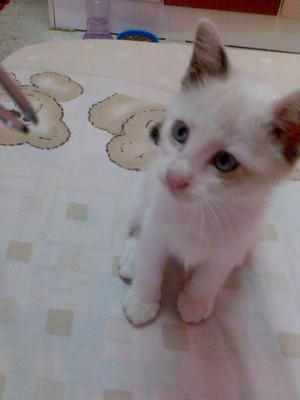

In [ ]:
example_image = example_row[image_col]

from IPython.display import Image, display
pil_img = Image(filename=example_image)
display(pil_img)

In [ ]:
%%time

from autogluon.multimodal import MultiModalPredictor
predictor = MultiModalPredictor(label=label_col)
predictor.fit(
    train_data=train_data,
    time_limit=120, # seconds
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250120_222048"
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.5.1+cu121
CUDA Version:       12.1
Memory Avail:       10.03 GB / 12.67 GB (79.1%)
Disk Space Avail:   76.02 GB / 112.64 GB (67.5%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed 

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

GPU Count: 1
GPU Count to be Used: 1
GPU 0 Name: Tesla T4
GPU 0 Memory: 0.25GB/15.0GB (Used/Total)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name              | Type                | Params | Mode 
------------------------------------------------------------------
0 | model             | MultimodalFusionMLP | 207 M  | train
1 | validation_metric | BinaryAUROC         | 0      | train
2 | loss_func         | CrossEntropyLoss    | 0      | train
------------------------------------------------------------------
207 M     Trainable params
0         Non-trainable params
207 M     Total params
828.307   Total estimated model params size (MB)
946       Modules in train mode
225       Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 1: 'val_roc_auc' reached 0.56250 (best 0.56250), saving model to '/content/drive/MyDrive/Books_Writings/NLPBook/AutogluonModels/ag-20250120_222048/epoch=0-step=1.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 4: 'val_roc_auc' reached 0.78194 (best 0.78194), saving model to '/content/drive/MyDrive/Books_Writings/NLPBook/AutogluonModels/ag-20250120_222048/epoch=0-step=4.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:03:28. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

Start to fuse 2 checkpoints via the greedy soup algorithm.


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/drive/MyDrive/Books_Writings/NLPBook/AutogluonModels/ag-20250120_222048")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




CPU times: user 55.7 s, sys: 37.3 s, total: 1min 33s
Wall time: 6min 2s


In [ ]:
scores = predictor.evaluate(test_data, metrics=["roc_auc"])
scores

Predicting: |          | 0/? [00:00<?, ?it/s]

{'roc_auc': 0.8608}

In [ ]:
predictions = predictor.predict(test_data.drop(columns=label_col))
print(predictions[:5])

print(test_data[label_col][:5])

Predicting: |          | 0/? [00:00<?, ?it/s]

8     1
70    1
82    1
28    0
63    1
Name: AdoptionSpeed, dtype: int64
8     0
70    1
82    1
28    0
63    1
Name: AdoptionSpeed, dtype: int64


In [ ]:
probas = predictor.predict_proba(test_data.drop(columns=label_col))
probas[:5]

Predicting: |          | 0/? [00:00<?, ?it/s]

0         1
8   0.471467  0.528533
70  0.407569  0.592431
82  0.010966  0.989034
28  0.585131  0.414869
63  0.093797  0.906203